# Time Series Analysis 
# (Evaluation of the process Drying of Biological Products)
An end-to-end pipeline is built to analyse the drying process of _Thomson seedless_ grapes to raisins. An experimental setup with an Data logger systems logs air conditions (air temperature and air humidity) under which the grapes are dried. Along with the air conditions water eveporates the the reducing weight of the grapes is recorded at a frequency of evey ten seconds.

## STEP 1 : Data Acquisition
The state vectors and meta data of the numerous experiements in stored in a seperate excel file. This files allows selection of a particular experiment, whose data is to be processed.

In [1]:
# Importing libraries
import pandas as pd

In [6]:
# Gathering meta data from excel
path_sv = r"data\SVM20211216.xlsx"
df_sv = pd.read_excel(path_sv)
exDt = df_sv['ExpName']
exMC = df_sv['MC_0']
exDM = df_sv['DryMass_f']
exWt = df_sv['Weight_0']

In [7]:
df_sv.head(5)

,Date,ExpName,ExpNo,Temp,Vel,Nos,Radius,Volume_0,Weight_0,Density_0,...,Volume_f,Weight_f,Density_f,MC_f,Water_f,DryMass_f,Logger_0,Logger_f,Error_0,Error_f
0,2021-12-20,01_20211220_,1,40,0.3,76,0.864945,206.0,209.933,1019.092233,...,32,39.025,1219.531250,0.321204,12.535,26.490,180.1281,39.083000,29.8049,-0.058000
1,2021-12-30,02_20211230_,2,40,1.5,71,0.850553,183.0,201.324,1100.131148,...,30,36.625,1220.833333,0.194894,7.138,29.487,179.6676,35.034200,21.6564,1.590800
2,2022-01-03,03_20220103_,3,40,1.5,65,0.894700,195.0,200.289,1027.123077,...,31,39.775,1283.064516,0.238592,9.490,30.285,192.0907,34.924200,8.1983,4.850800
3,2022-01-08,04_20220108_,4,45,1.0,66,0.879377,188.0,200.785,1068.005319,...,37,32.746,885.027027,0.346149,11.335,21.411,180.6049,6.292500,20.1801,26.453500
4,2022-01-20,05_20220120_,5,55,1.0,55,0.944315,194.0,203.559,1049.273196,...,23,29.494,1282.347826,0.131078,3.866,25.628,232.9592,-4.259097,-29.4002,33.753097


- __Details of experiments__ : The first three columns represent the date, name and number of experiments. 
- __Details of environment__ : The next two columns are the properties of the drying environment which are defined by the set points for air temperature and air velocity.
- __Details of substrate__ : The columns 6 and 7 are properties of the products, that are number of grape berries and the average radius of the grape berry at the inception of the experiment.
- __Details of first and last reading taken manually__ :Columns 7 to 12 and columns 14 to 2 are the properties of the products before and after the experments are completed.
- __Detials of data logger calibaration__ : Finally the last two columns are the errors in the measurement of the data logger that are calibarated using a micro balance

In [8]:
df_sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11 non-null     datetime64[ns]
 1   ExpName    11 non-null     object        
 2   ExpNo      11 non-null     int64         
 3   Temp       11 non-null     int64         
 4   Vel        11 non-null     float64       
 5   Nos        11 non-null     int64         
 6   Radius     11 non-null     float64       
 7   Volume_0   11 non-null     float64       
 8   Weight_0   11 non-null     float64       
 9   Density_0  11 non-null     float64       
 10  MC_0       11 non-null     float64       
 11  Water_0    11 non-null     float64       
 12  DryMass_0  11 non-null     float64       
 13  Volume_f   11 non-null     int64         
 14  Weight_f   11 non-null     float64       
 15  Density_f  11 non-null     float64       
 16  MC_f       11 non-null     float64       
 17 

In [13]:
# This folder hosts data for each of the 11 experiments
path_collection  = r"data"

Each folder contains csv files created by the data logger. Every hour new file is created for ease of handling. Experiments are are run upto 10 days, and approximately 240 files are created. These files are collected in seperate folders for each experiments.
***
### User defined library
A user defined librabry name __dryCurveFunctions__ is created which contains multiple function necessary for this analysis. Each of these functions are called during Data aquisition, Cleaning, Pre-processing and EDA.

In [14]:
# Importing Essential Libraries
from dryCurveFunctions import dryingCurve as dc

In [28]:
# State Vector / Experiment Selection
exp   = -1 + 10

# Calibration: If Tray weight is not calibrated into the data logger, this value changes to weight of the tray being used.
TrayW = 0 

# Displays details of experiment under consideration
print("Analysis of Data at location :  " + path_collection + "\\" + exDt[exp])
print("Experiment         = ", exDt[exp])
print("Initial MC (MC(wb))= ", round(exMC[exp],3))
print("Dry Mass   (grams) = ", round(exDM[exp],3))
print("Initial Wt (grams) = ", round(exWt[exp],3))

Analysis of Data at location :  data\10_20220316_
Experiment         =  10_20220316_
Initial MC (MC(wb))=  0.785
Dry Mass   (grams) =  48.459
Initial Wt (grams) =  217.398


##### Multiple csv files are concatenated using the concat function as shown in below snippet

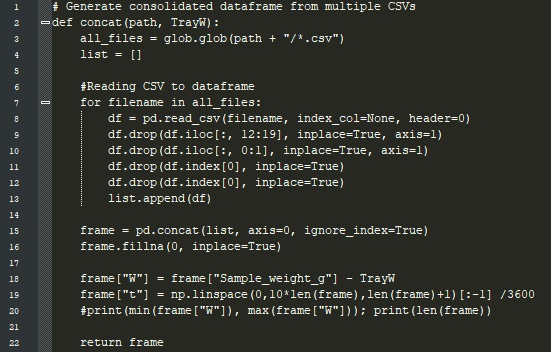

In [26]:
# Importing data into dataframe using glob
frame = dc.concat(path_collection + "\\" + exDt[exp], TrayW)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128729 entries, 0 to 128728
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             128729 non-null  object 
 1   Time             128729 non-null  object 
 2   T_ambient        128729 non-null  float64
 3   RH_ambient       128729 non-null  float64
 4   T_upstream       128729 non-null  float64
 5   RH_upstream      128729 non-null  float64
 6   T_center         128729 non-null  float64
 7   RH_center        128729 non-null  float64
 8   T_downstream     128729 non-null  float64
 9   RH_downstream    128729 non-null  float64
 10  Sample_weight_g  128729 non-null  float64
 11  W                128729 non-null  float64
 12  t                128729 non-null  float64
dtypes: float64(11), object(2)
memory usage: 12.8+ MB


## STEP 2 : Data Cleaning

In [27]:
# Dropping any NaNs and blanck cells.
frame.dropna(axis=0)

,Date,Time,T_ambient,RH_ambient,T_upstream,RH_upstream,T_center,RH_center,T_downstream,RH_downstream,Sample_weight_g,W,t
0,16/03/22,14:14:01,32.656302,41.997822,40.521846,23.564503,42.266018,20.109694,41.193716,23.976039,56.884015,56.884015,0.000000
1,16/03/22,14:14:11,32.685504,42.064091,40.552402,23.841481,42.219551,20.394984,41.278601,24.260329,57.106305,57.106305,0.002778
2,16/03/22,14:14:21,32.551744,42.122257,40.396970,24.078029,42.070613,20.636061,41.172644,24.474367,57.074170,57.074170,0.005556
3,16/03/22,14:14:31,32.620766,42.271046,40.488213,24.338466,42.004885,20.745607,41.104319,24.692665,57.166455,57.166455,0.008333
4,16/03/22,14:14:41,32.713147,42.348820,40.135564,24.461403,41.812830,20.880946,40.815945,24.754713,57.008985,57.008985,0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128724,31/03/22,14:15:19,30.290886,55.335118,37.583486,35.605703,39.176072,31.127675,38.237207,35.761977,62.879896,62.879896,357.566667
128725,31/03/22,14:15:29,30.507083,55.186452,37.690263,35.591176,39.144370,31.180458,38.197387,35.833791,62.777631,62.777631,357.569444
128726,31/03/22,14:15:39,30.511654,54.825994,37.434548,35.712466,39.413672,31.260463,38.327783,35.872744,66.672285,66.672285,357.572222
128727,31/03/22,14:15:49,30.414136,54.711278,37.550605,35.813076,39.255232,31.307900,38.051679,36.023269,66.557661,66.557661,357.575000


Weight in column _W_ , Air temperature in column _T_center_ and relative Humidity in column _RH_center_ are the data values important to this analysis. Below is the plot of the raw data.

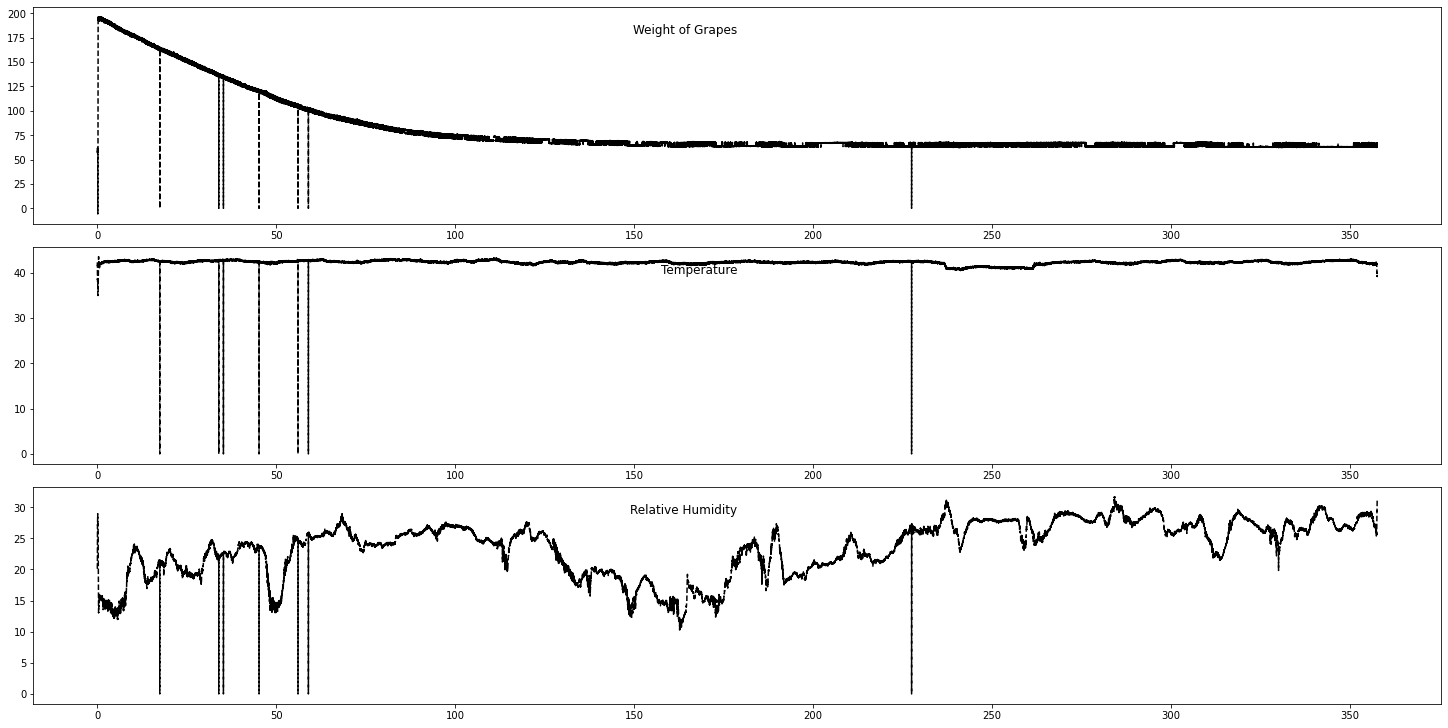

In [76]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(20, 10), constrained_layout=True)
axs[0].plot(frame['t'], frame['W'], 'k--',);
axs[1].plot(frame['t'], frame['T_center'], 'k--',);
axs[2].plot(frame['t'], frame['RH_center'], 'k--',);

ax = axs[0]; ax.set_title('Weight of Grapes', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[1]; ax.set_title('Temperature', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[2]; ax.set_title('Relative Humidity', loc='right', y=0.85, x=0.5, fontsize='large');

#### Frequency of data collection is excessively high. Therefore reading are averaged over _nset_ number of values and a function is written for the same, which can be seen in the snippet below.

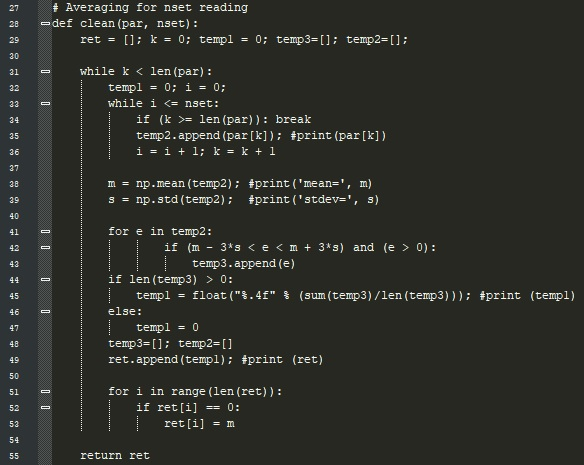

In [83]:
# Data Cleaning, preprocessing
nset   = 120/6
tRed   = dc.clean(frame["t"],6*nset);
wRed   = dc.clean(frame["W"],6*nset);         print("Weight      :  min = ", round(min(wRed),2)," max = ", round(max(wRed),2))
TRed   = dc.clean(frame["T_center"],6*nset);  print("Temperature :  min = ", round(min(TRed),2)," max = ", round(max(TRed),2))
HRed   = dc.clean(frame["RH_center"],6*nset); print("Re.Humidity :  min = ", round(min(HRed),2)," max = ", round(max(HRed),2))
print("Time        :  min = ", round(min(tRed),2)," max = ", round(max(tRed),2))

Weight      :  min =  62.85  max =  194.35
Temperature :  min =  38.27  max =  43.04
Re.Humidity :  min =  11.23  max =  31.23
Time        :  min =  0.17  max =  357.43


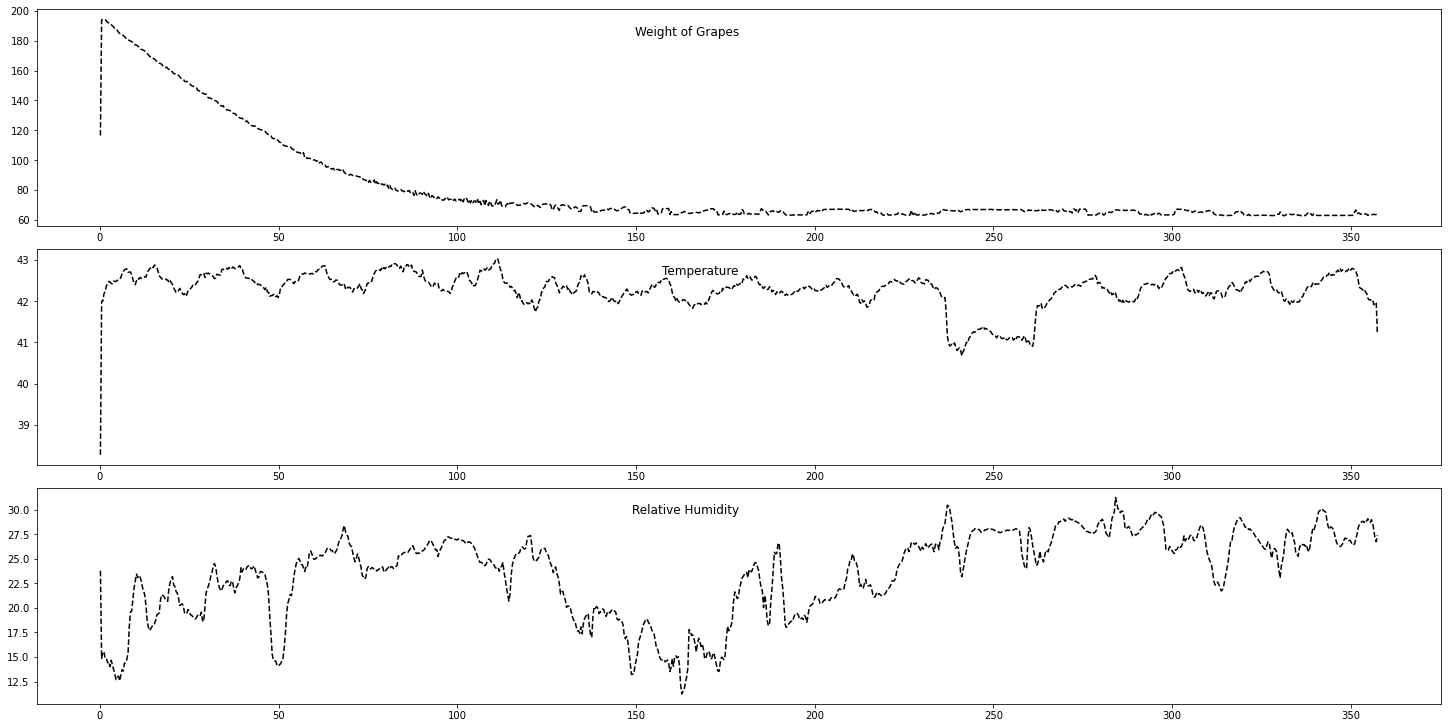

In [84]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), constrained_layout=True)
axs[0].plot(tRed, wRed, 'k--',);
axs[1].plot(tRed, TRed, 'k--',);
axs[2].plot(tRed, HRed, 'k--',);

ax = axs[0]; ax.set_title('Weight of Grapes', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[1]; ax.set_title('Temperature', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[2]; ax.set_title('Relative Humidity', loc='right', y=0.85, x=0.5, fontsize='large');

## STEP 3 : Pre-processing

In [95]:
tRed = tRed[1:]
wRed = wRed[1:]
TRed = TRed[1:]
HRed = HRed[1:]

#### Two new features are created Moisture Content and Moirture Ratio as decribed in [Kulkarni et al. (2022)](https://onlinelibrary.wiley.com/doi/epdf/10.1002/cjce.24514)
Functions are written in the user defined 

In [100]:
MC, MR = dc.genMCMR(wRed, exp, exDM);         
print("MC :  min = ", round(min(MC),2),)
print("MC :  max = ", round(max(MC),2),)

MC :  min =  0.23
MC :  max =  0.75


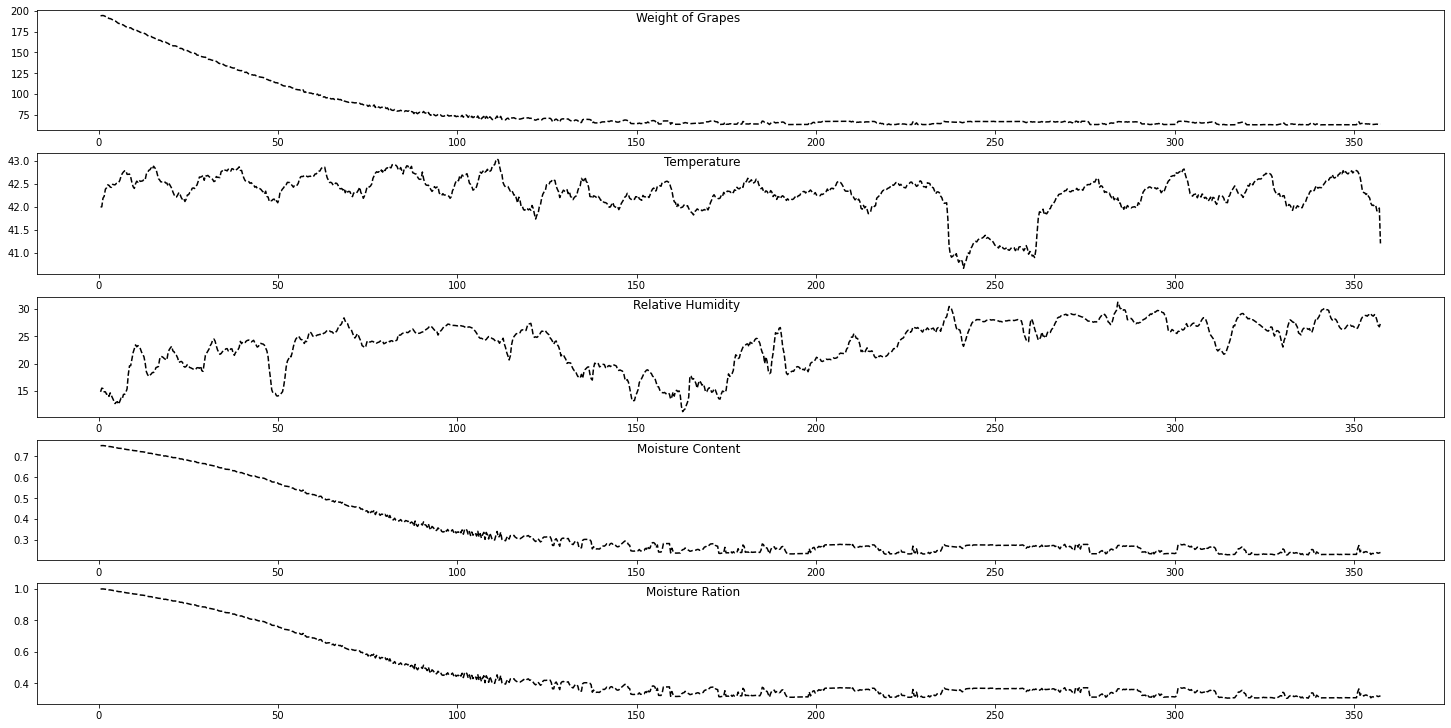

In [104]:
fig, axs = plt.subplots(5, 1, figsize=(20, 10), constrained_layout=True)
axs[0].plot(tRed, wRed, 'k--',);
axs[1].plot(tRed, TRed, 'k--',);
axs[2].plot(tRed, HRed, 'k--',);
axs[3].plot(tRed, MC, 'k--',);
axs[4].plot(tRed, MR, 'k--',);

ax = axs[0]; ax.set_title('Weight of Grapes', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[1]; ax.set_title('Temperature', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[2]; ax.set_title('Relative Humidity', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[3]; ax.set_title('Moisture Content', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[4]; ax.set_title('Moisture Ration', loc='right', y=0.85, x=0.5, fontsize='large');

# STEP 3 : Exploratory Data Analysis

# Model building

# Evaluation and Validation

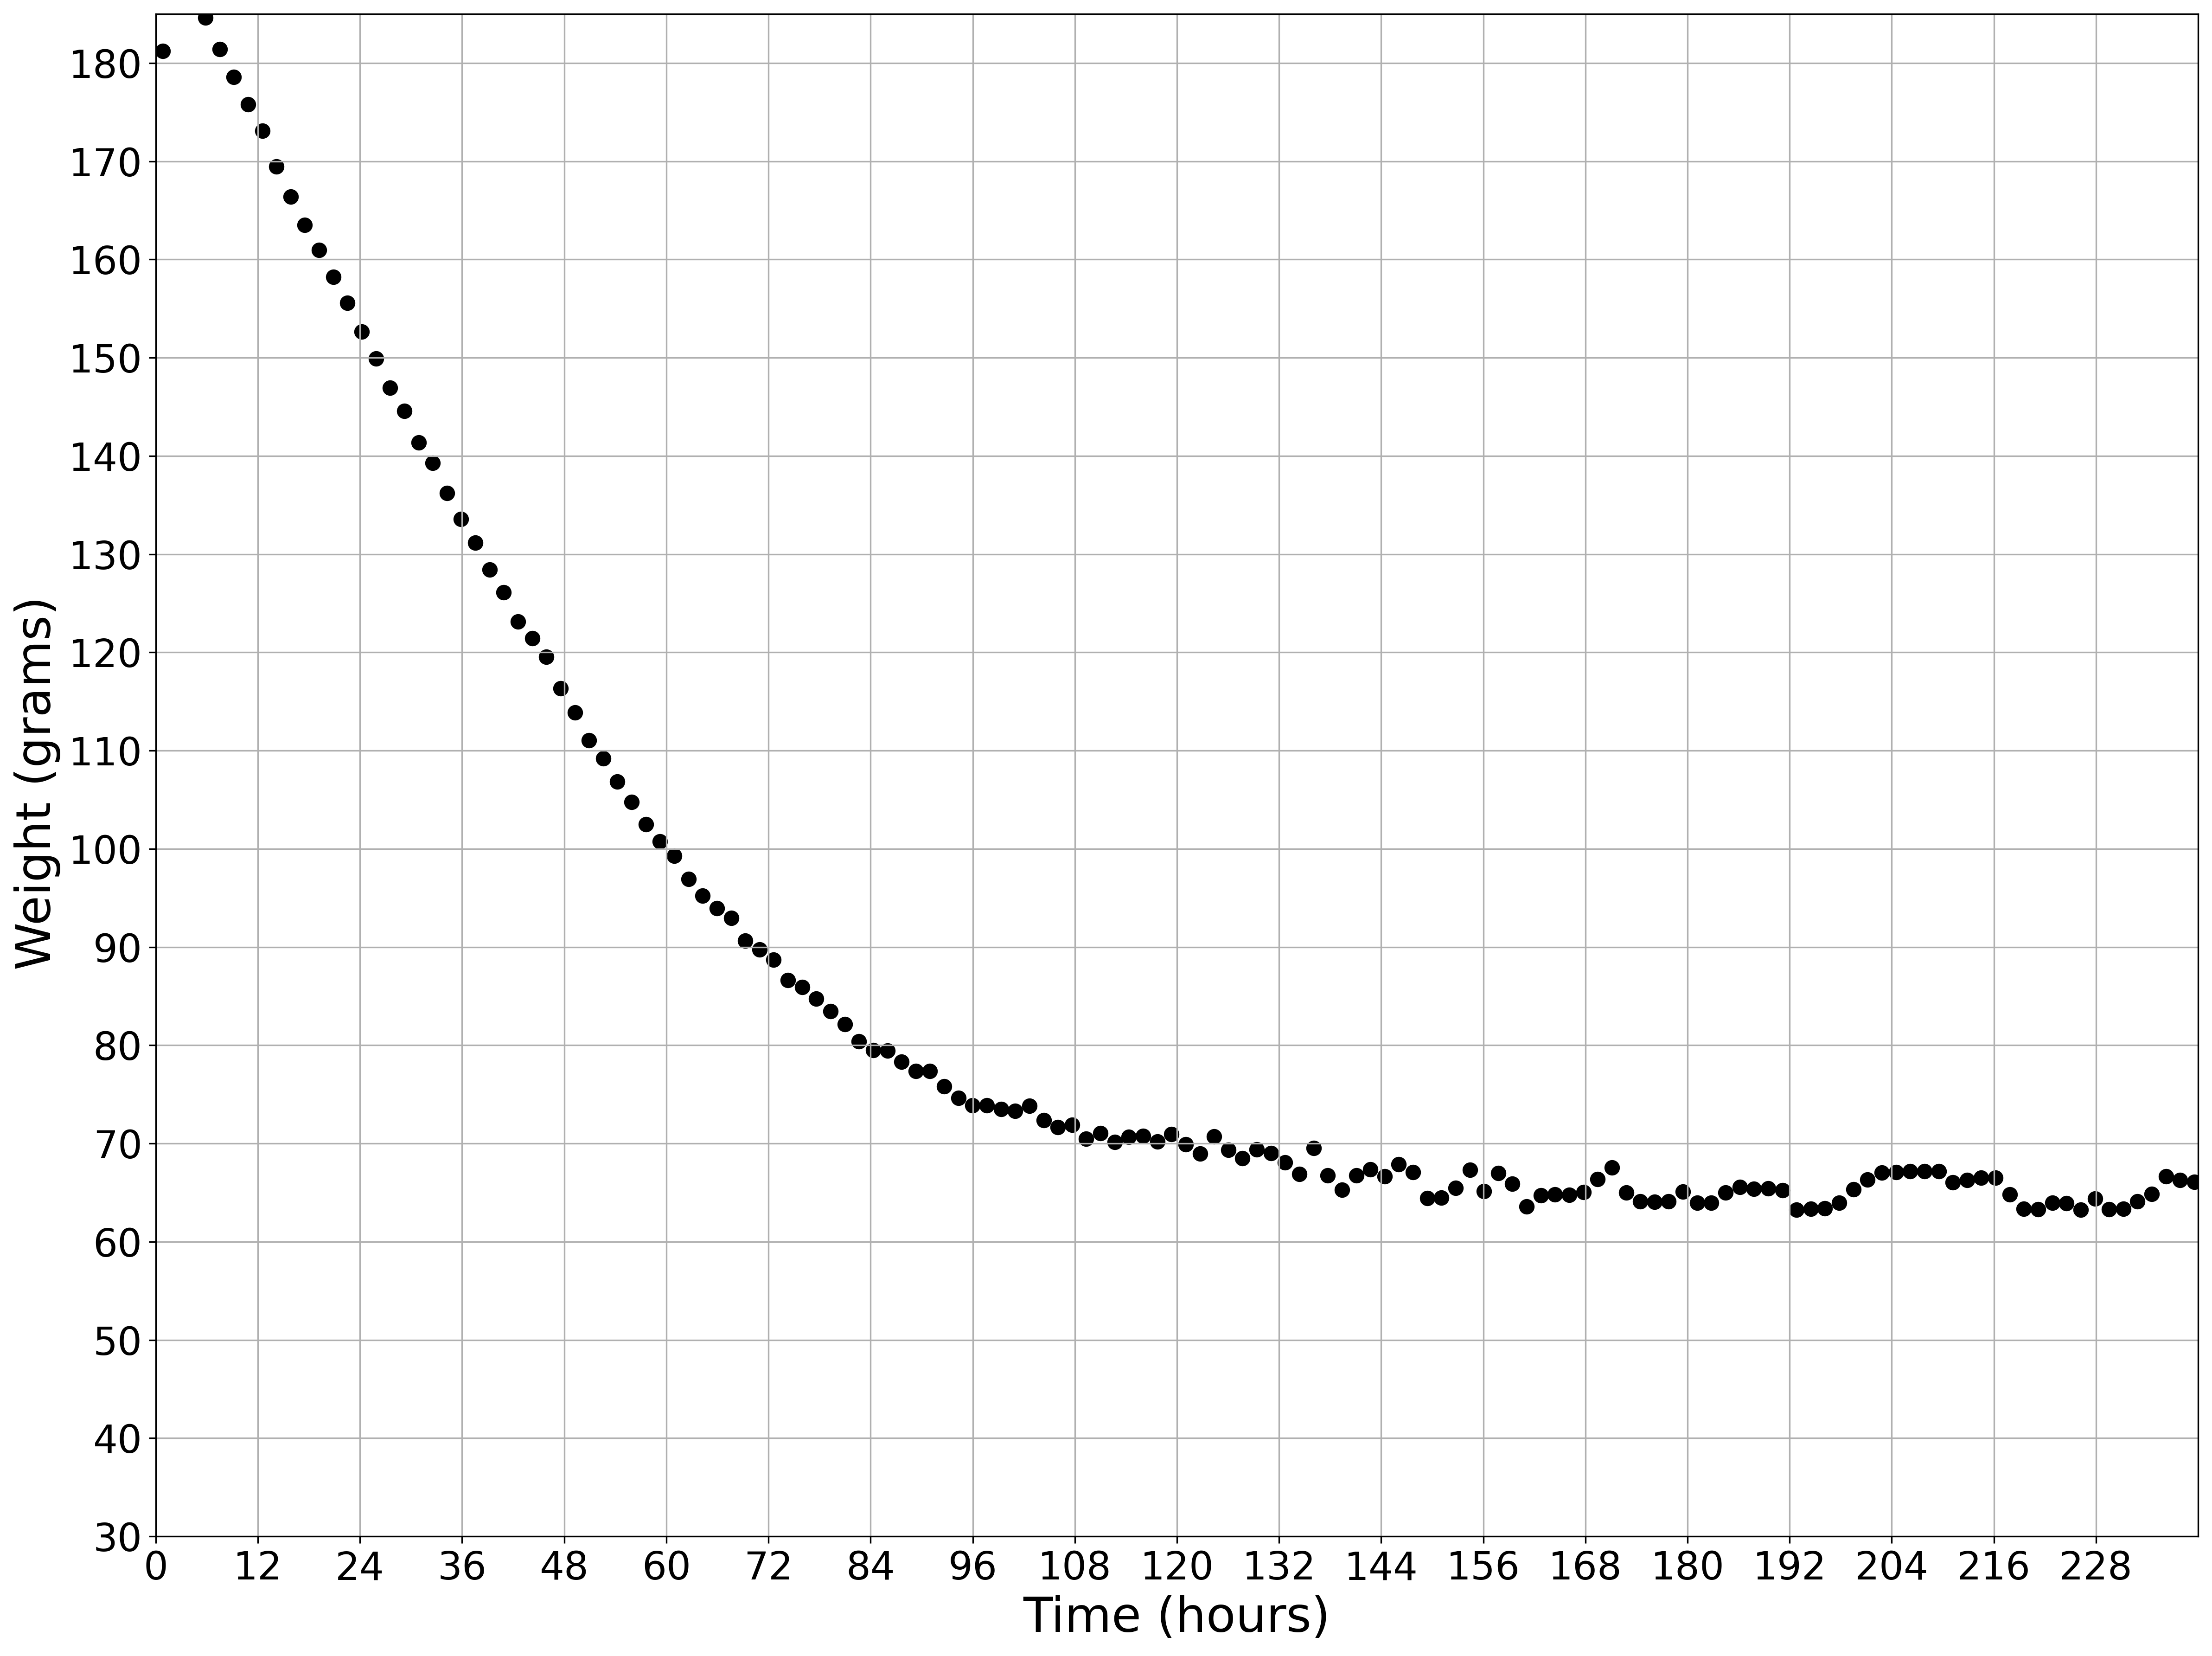

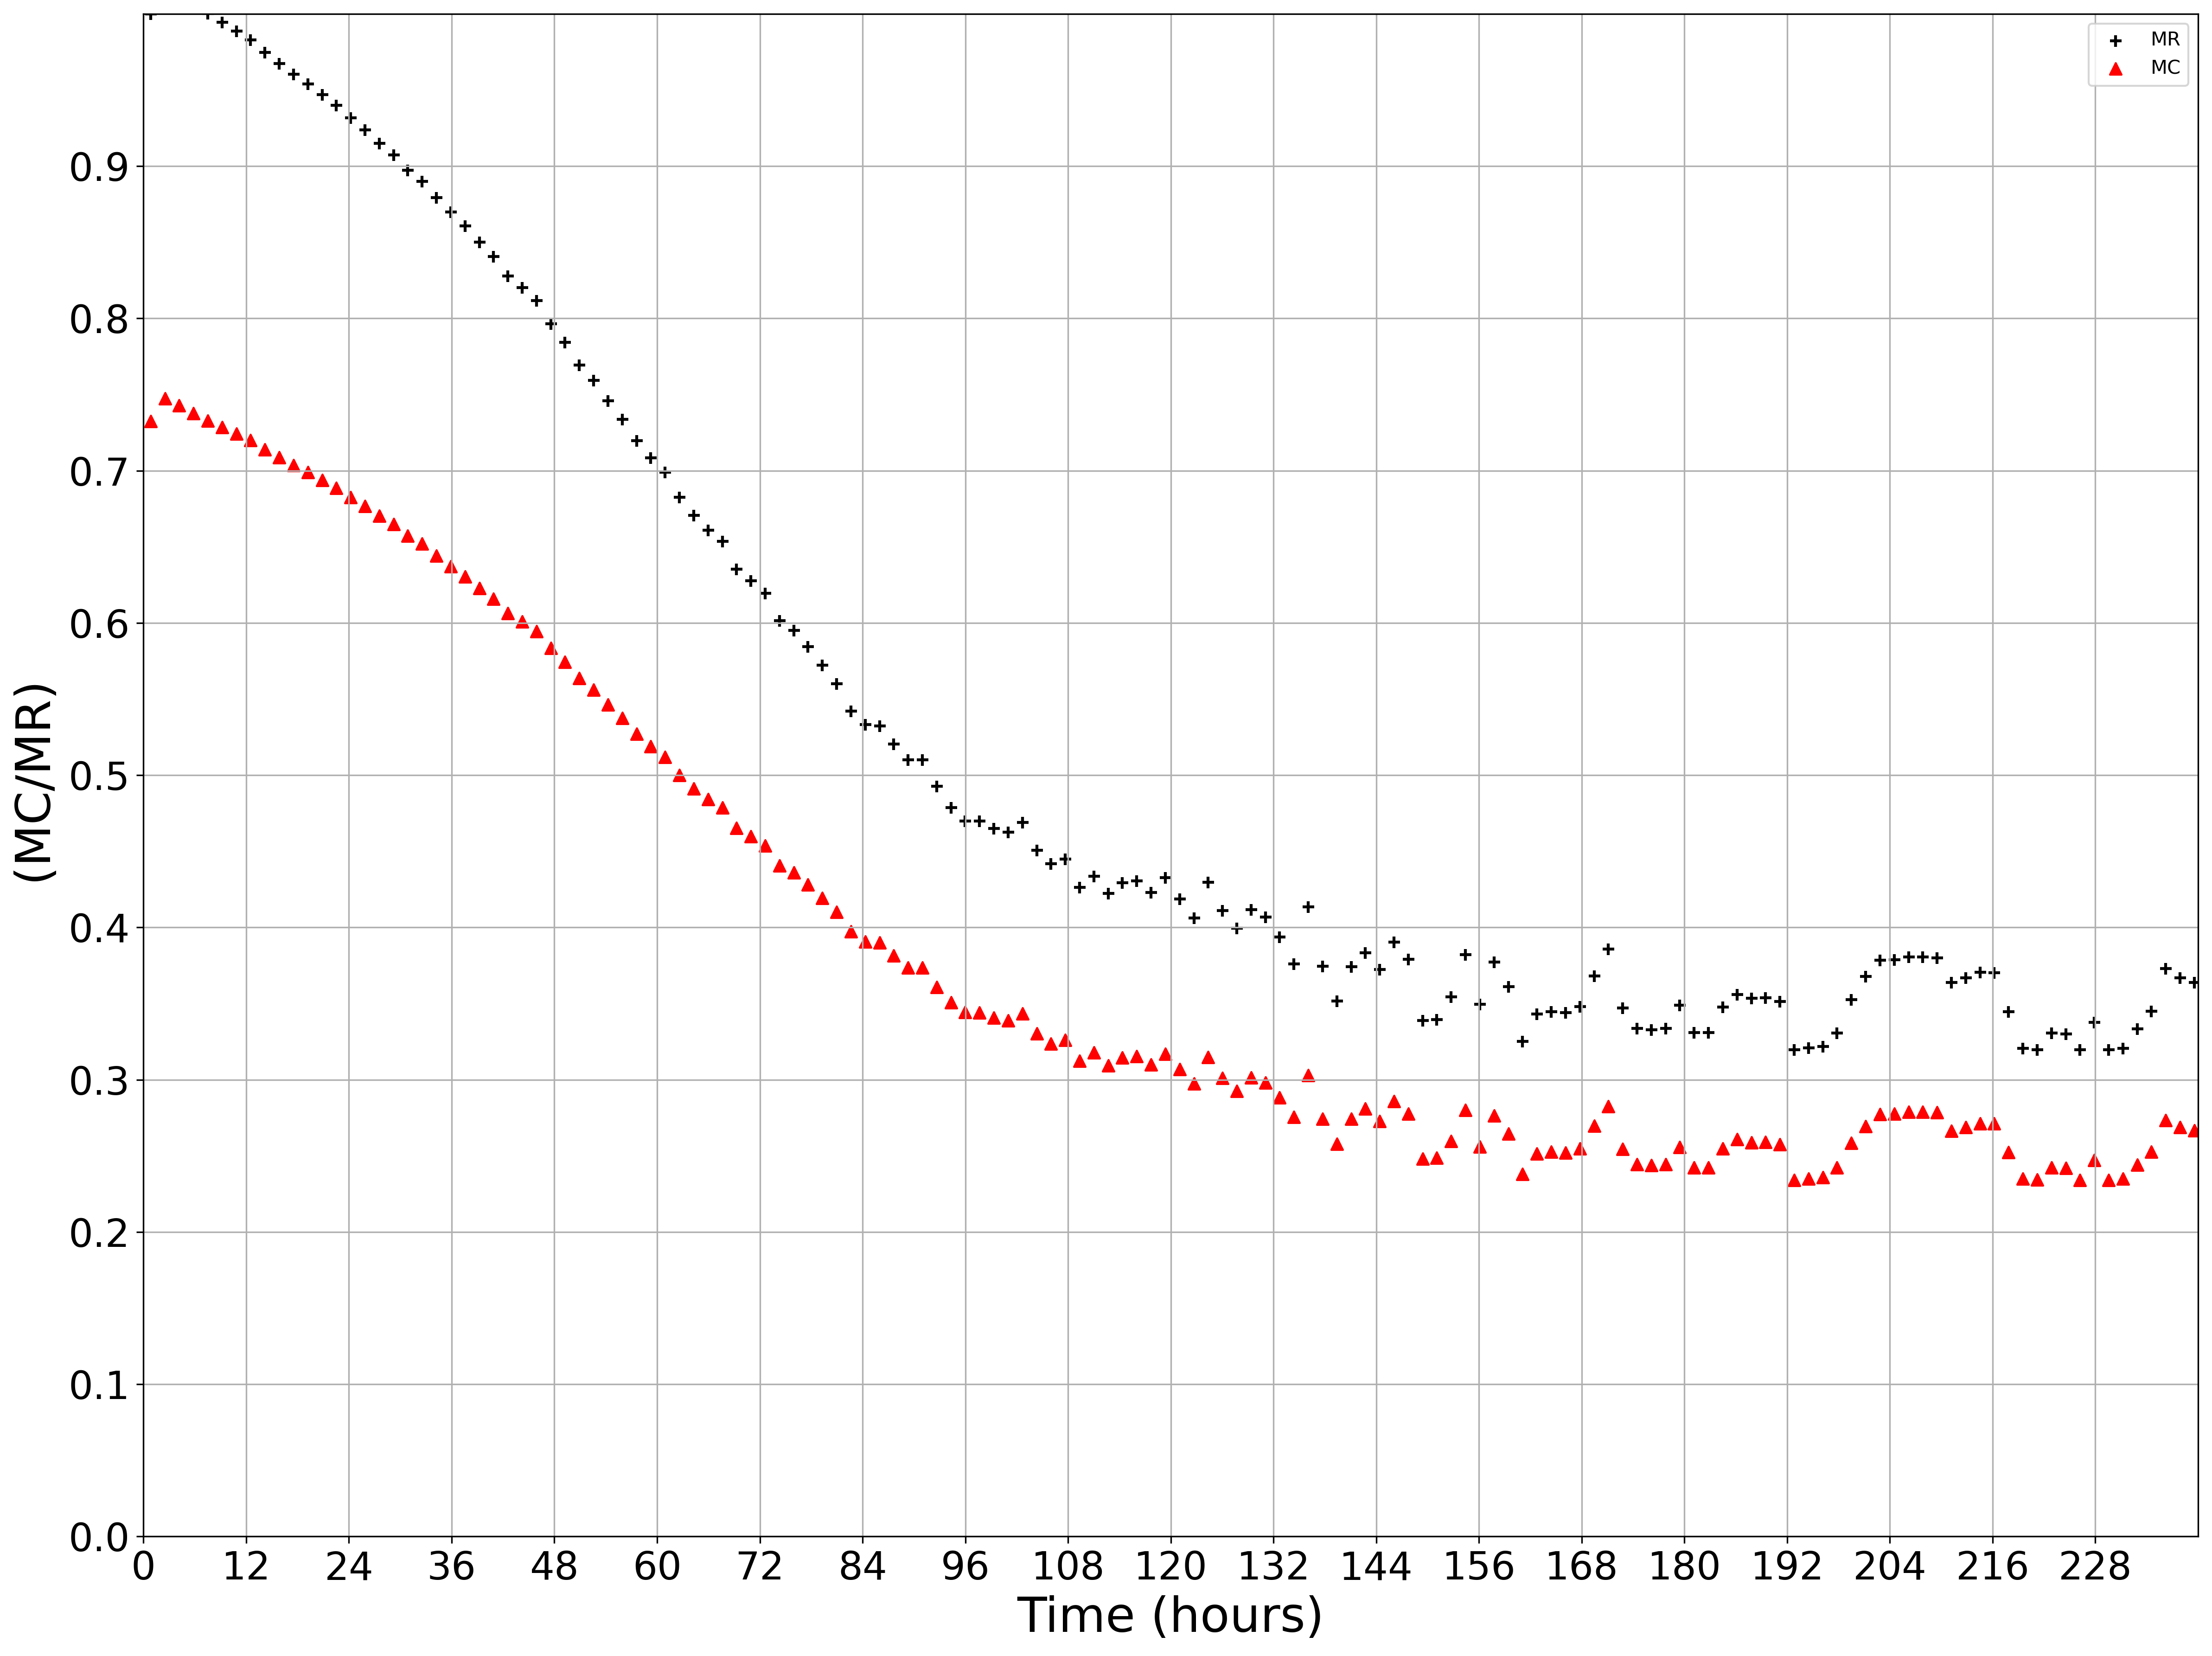

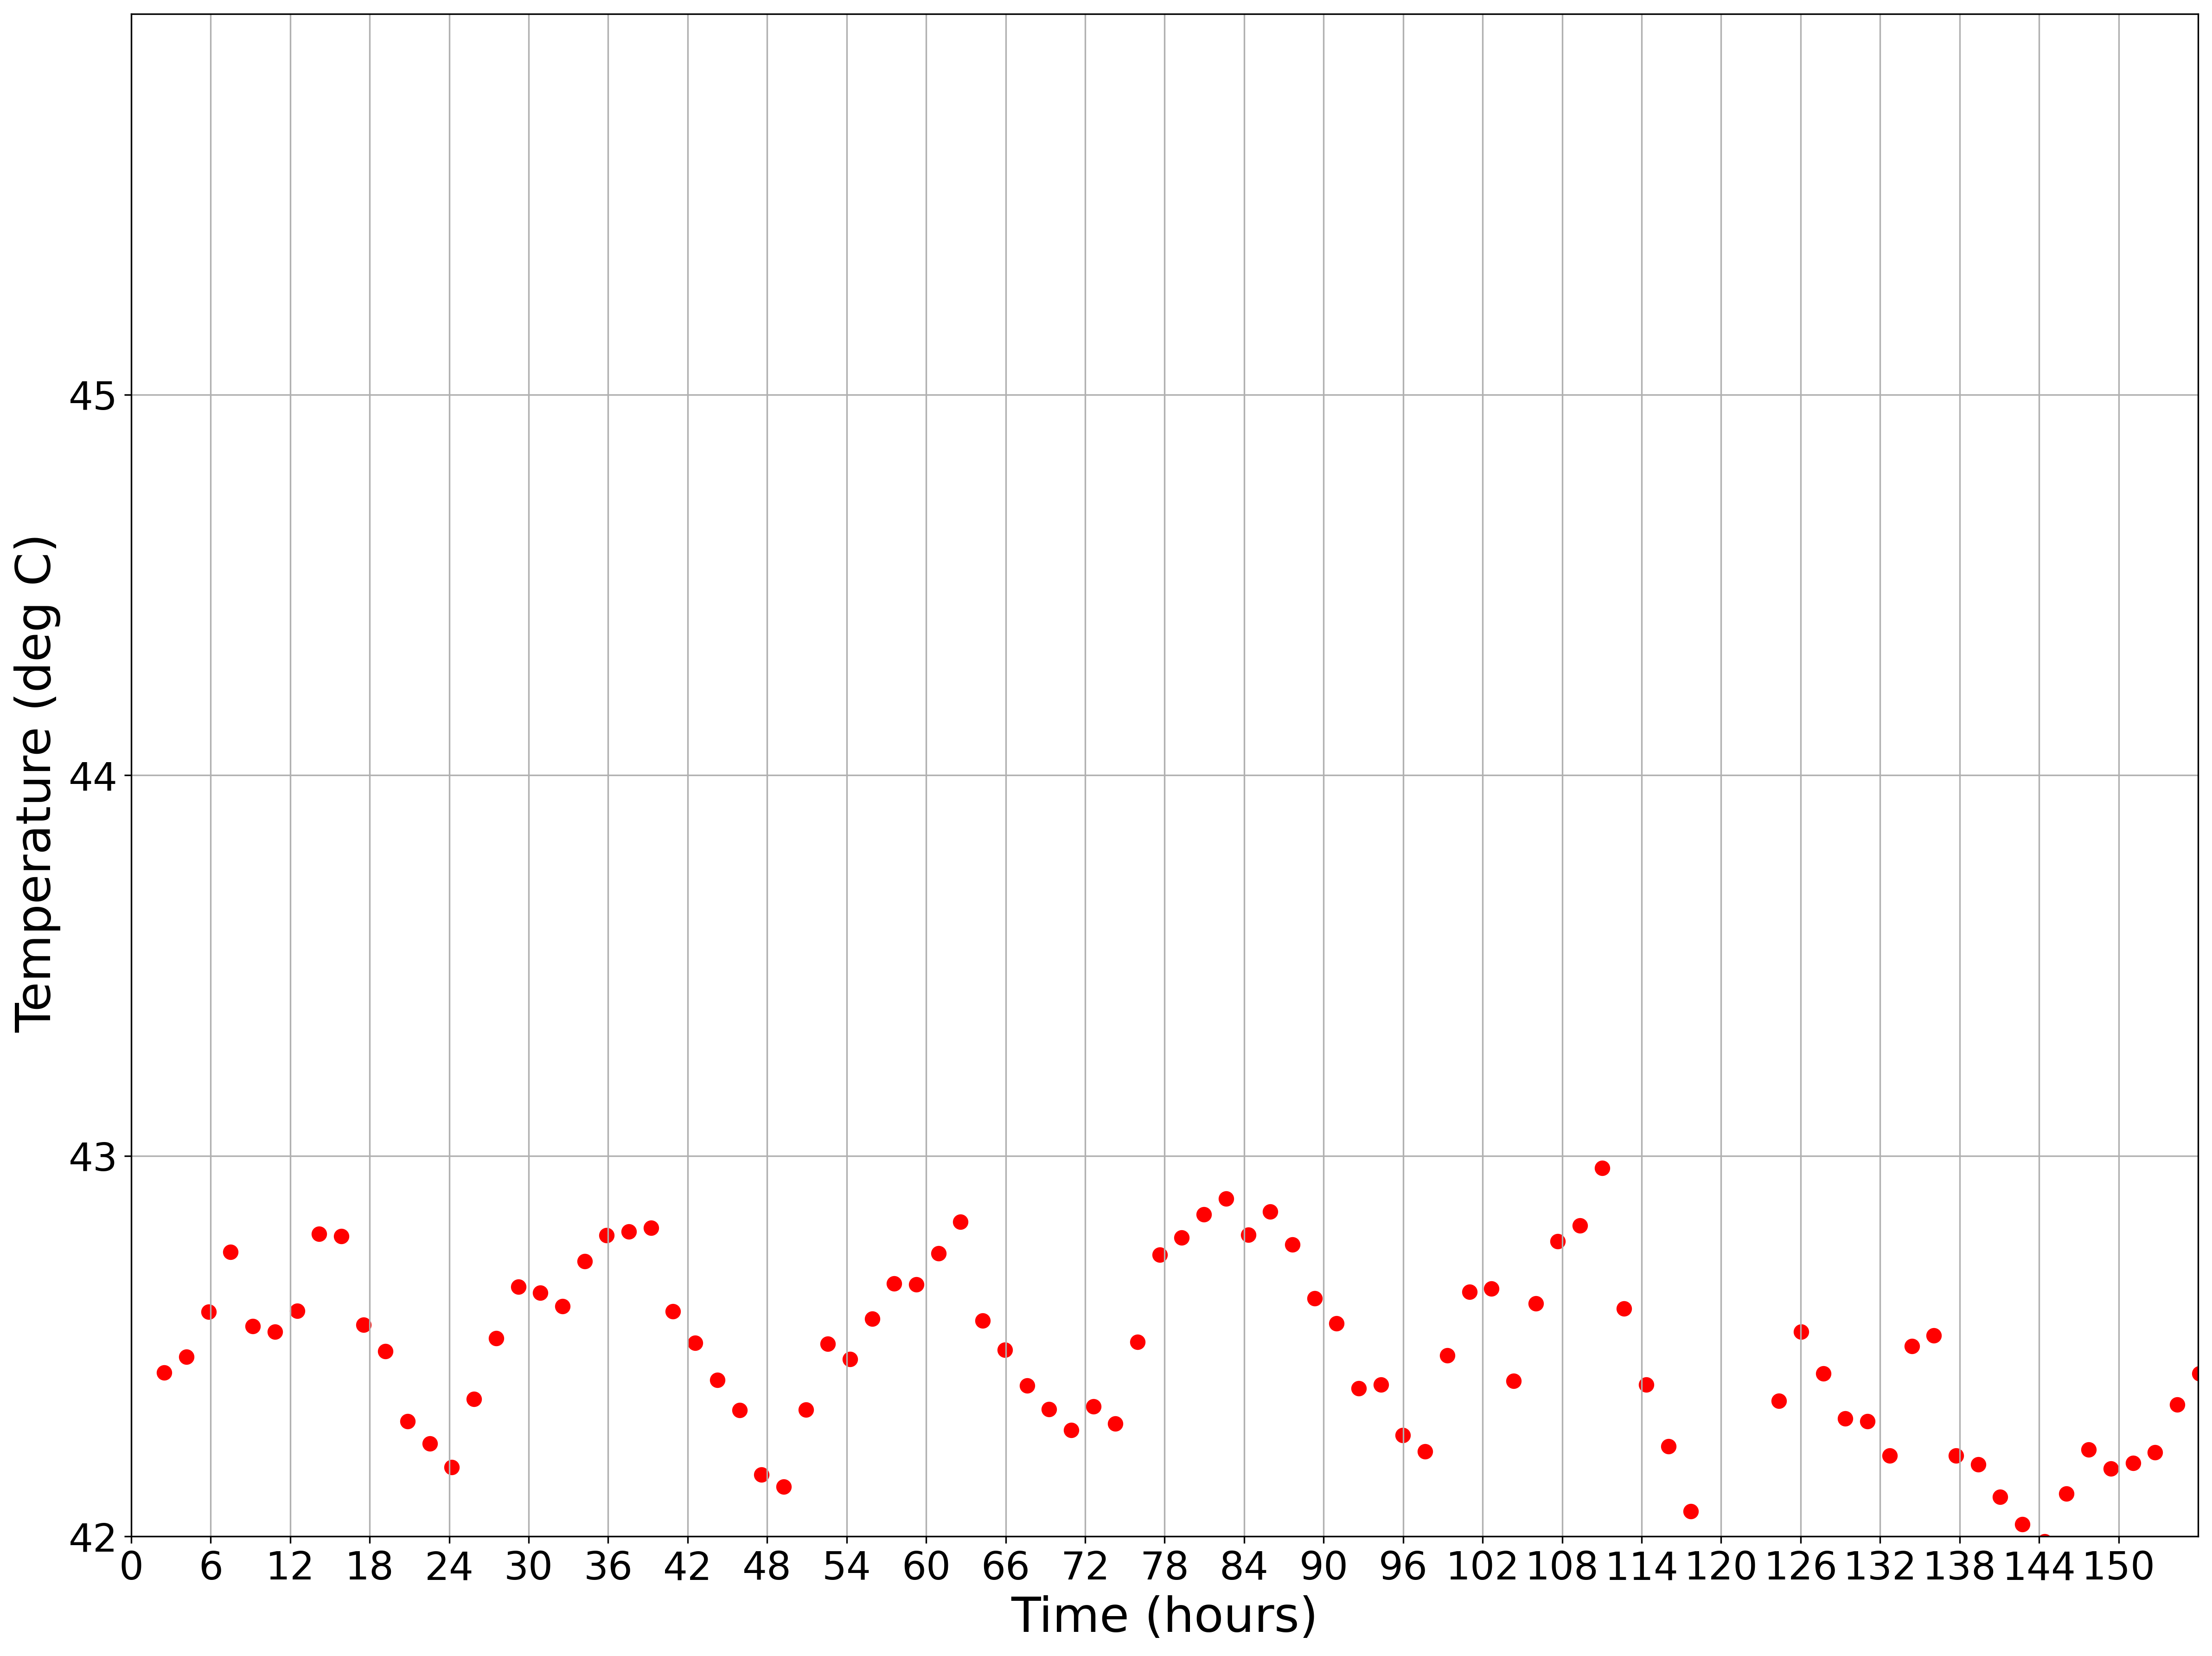

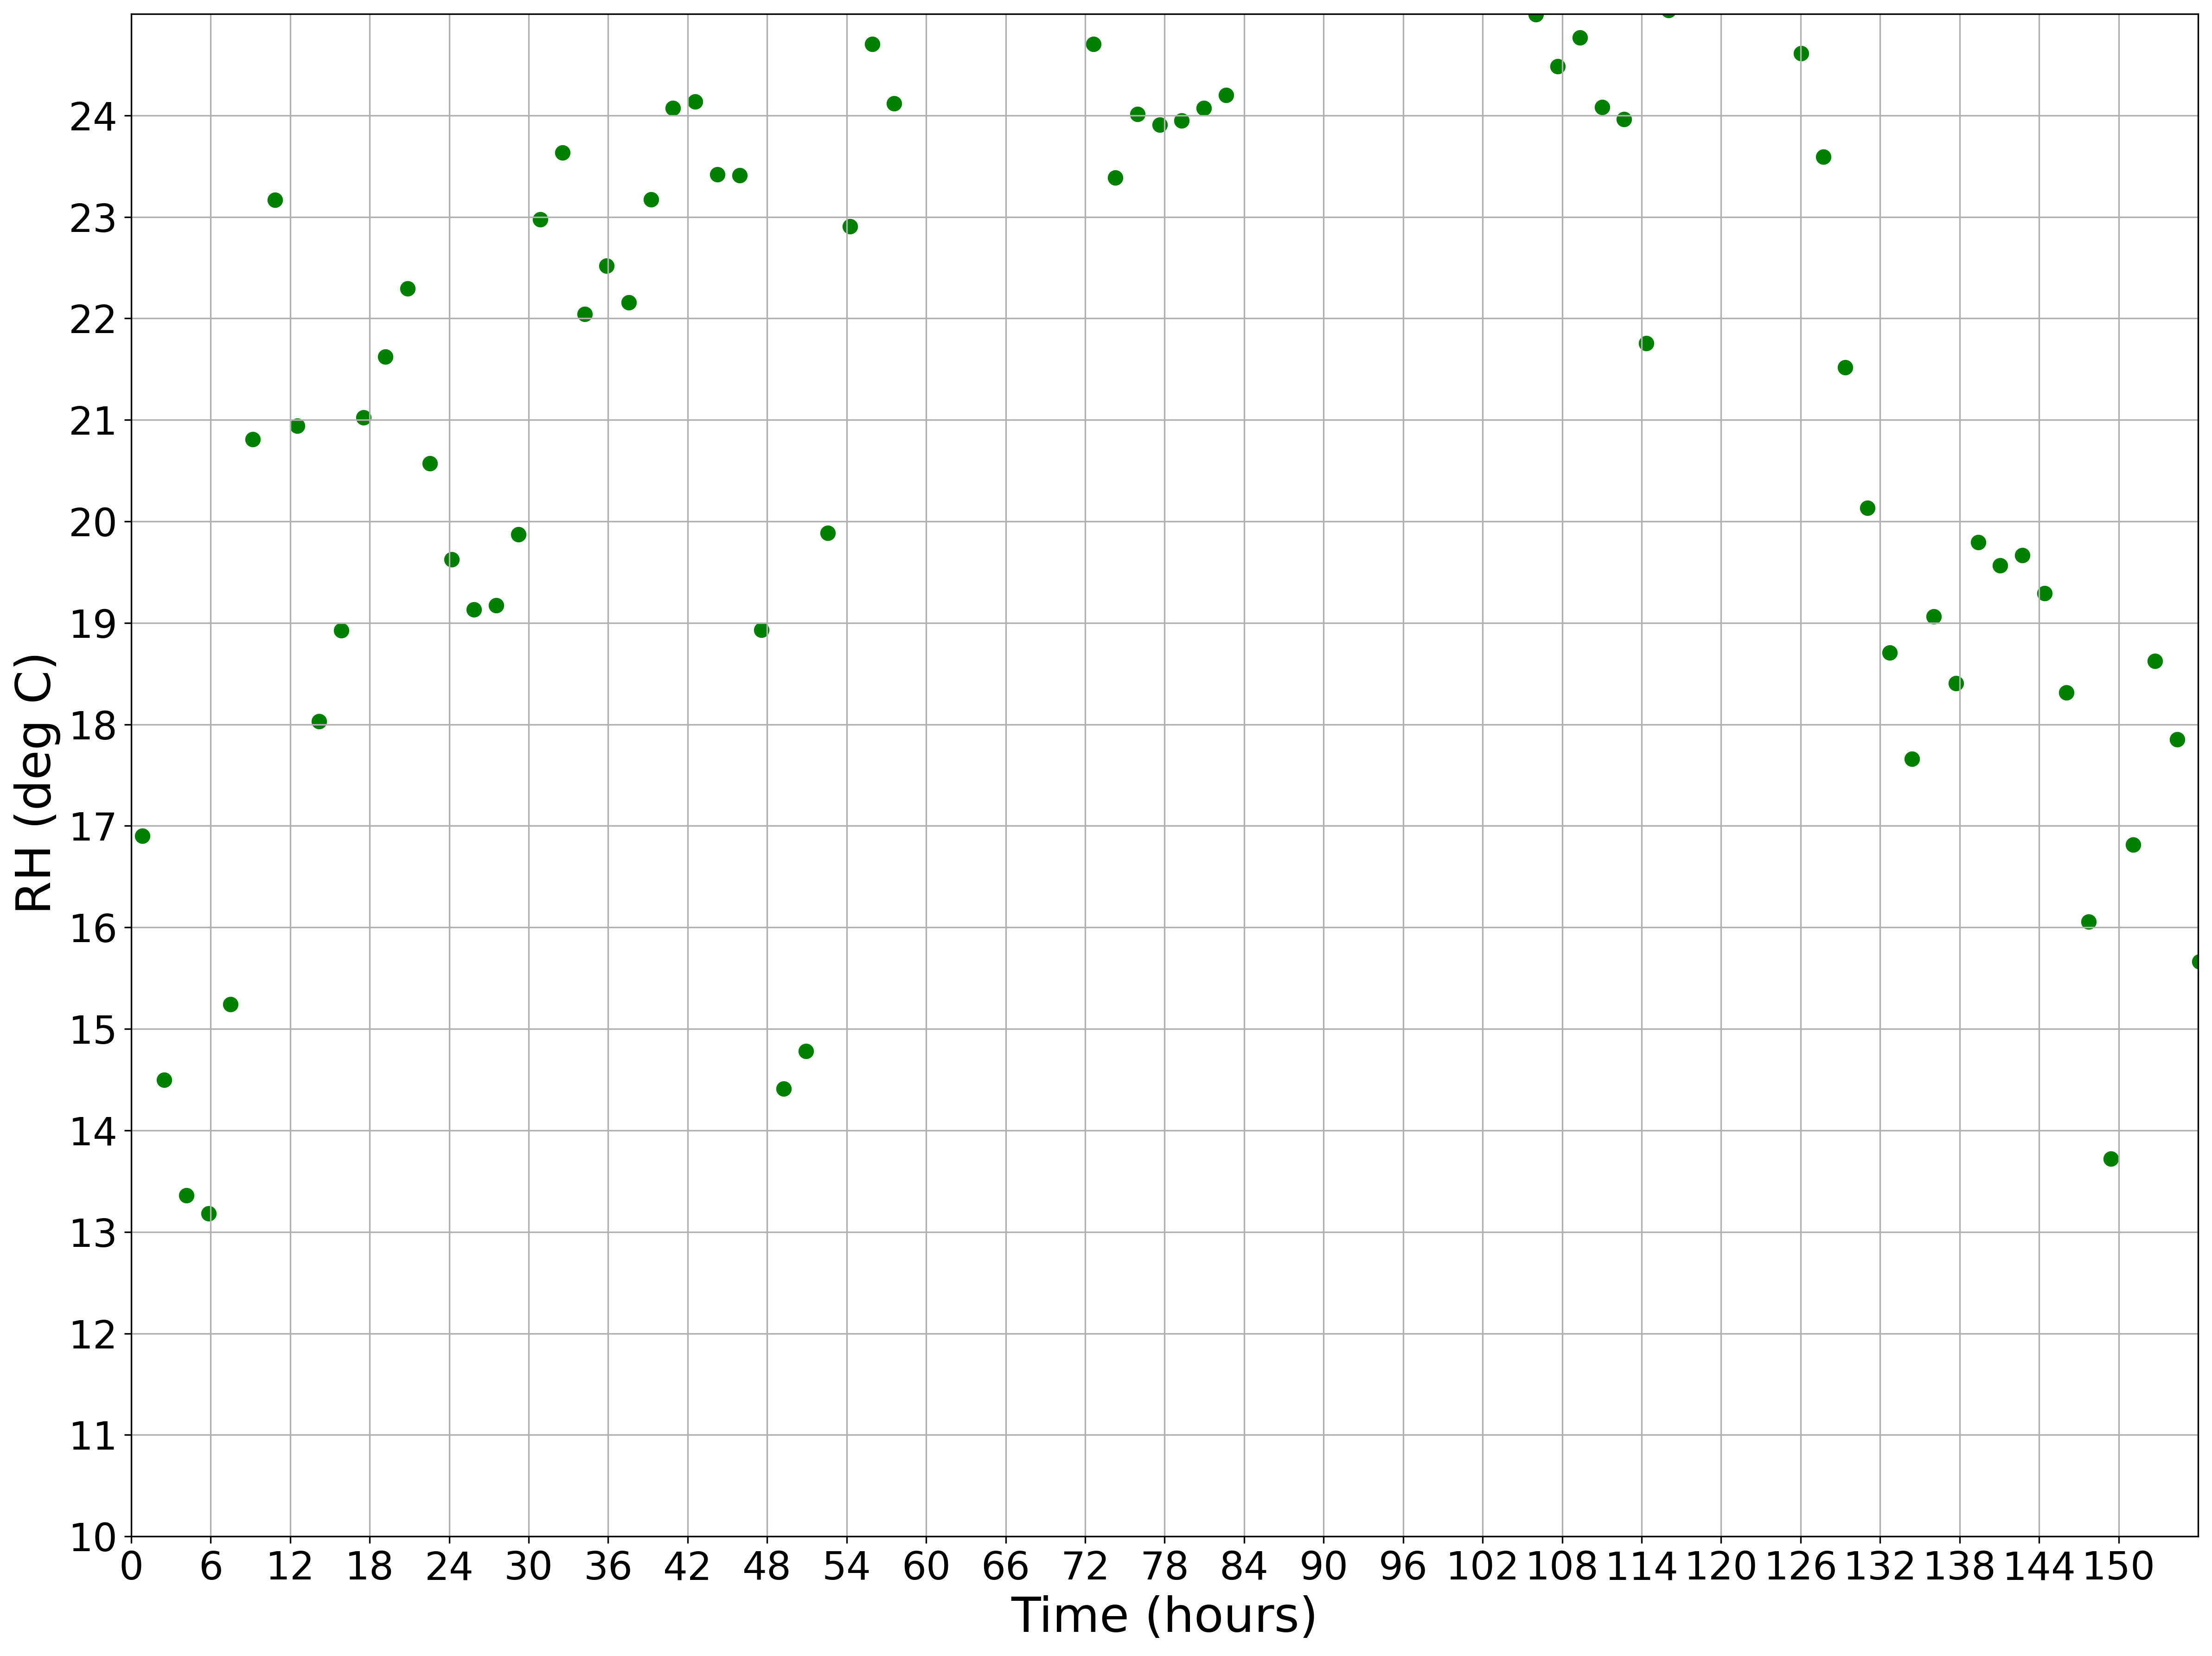

In [2]:
dc.WeightVsTime(tRed,
                wRed,
                0,
                12*20,
                12,
                30,
                185,
                10)

In [ ]:
dc.TimeVsMC(tRed,MC,MR,0,12*20,12,0,1,0.1)

In [ ]:
dc.TempVsTime(tRed,TRed,0,12*13,6,42,46,1)

In [ ]:
dc.RelHVsTime(tRed,HRed,0,12*13,6,10,25,1)